In [112]:
# Fuente desde donde hemos sacado los datos
# https://zenodo.org/record/4252636
import pandas as pd
# Leemos el dataset
cochesUsados = pd.read_csv('cochesPracticaOriginal.csv')
cochesUsadosOriginal = cochesUsados.copy()

In [113]:
import string
import unicodedata


def splitBrand(carTitle):
    dataArray = carTitle.split('-')
    brand = dataArray[0:-1]
    brand = ' '.join(brand).strip()
    return brand


def splitModel(carTitle):
    dataArray = carTitle.split('-')
    model = dataArray[-1]
    return str(model).strip()


def clean_text(text):
    # caracteres permitidos en inglés
    valid_chars = string.ascii_letters + string.digits + " "

    # convierte las vocales con acentos a su forma sin acento
    clean_text = unicodedata.normalize("NFKD", text).encode(
        "ASCII", "ignore").decode().upper()

    # elimina los caracteres que no están en valid_chars
    clean_text = "".join(c for c in clean_text if c in valid_chars)
    return clean_text


def removeTextAndGetInt(text, toBeRemoved):
    try:
        text.strip()
        return int(text.replace(toBeRemoved, ''))
    except ValueError:
        return int(0)


def addExtraFields(data):
    data['brand'] = data.apply(lambda row: splitBrand(row['ad_title']), axis=1)
    data['model'] = data.apply(lambda row: splitModel(row['ad_title']), axis=1)
    return data


def cleanData(data):
    # Eliminamos columnas innecesarias
    data.drop(['Unnamed: 0', 'car_desc', 'image_url', 'ad_id', 'ad_type',
              'ad_time', 'ts', 'car_door_num'], axis=1, inplace=True)
    # Eliminamos lineas incorrectas csv
    data = data[(data['ad_title'] != 'ad_title') &
                (data['car_year'].str.isnumeric())]
    data['car_km'] = data.apply(
        lambda row: removeTextAndGetInt(row['car_km'], 'kms'), axis=1)
    data['car_power'] = data.apply(
        lambda row: removeTextAndGetInt(row['car_power'], 'CV'), axis=1)
    data['brand'] = data.apply(lambda row: clean_text(row['brand']), axis=1)
    data['model'] = data.apply(lambda row: clean_text(row['model']), axis=1)
    data['region'] = data.apply(lambda row: clean_text(row['region']), axis=1)
    data['advertizer_type'] = data.apply(
        lambda row: clean_text(row['advertizer_type']), axis=1)
    data['car_engine_type'] = data.apply(
        lambda row: clean_text(row['car_engine_type']), axis=1)
    data['car_price'] = data.apply(lambda row: int(row['car_price']), axis=1)
    data['car_year'] = data.apply(lambda row: int(row['car_year']), axis=1)
    data = data[data['car_km'] > 0]
    data.drop(['ad_title'], axis=1, inplace=True)
    # Eliminamos lineas con valores nulos
    data = data.dropna()
    return data


cochesUsados = addExtraFields(cochesUsados)
cochesUsados = cleanData(cochesUsados)


C:\Users\Djmir\AppData\Local\Temp\ipykernel_20696\3993664517.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['car_km'] = data.apply(
C:\Users\Djmir\AppData\Local\Temp\ipykernel_20696\3993664517.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['car_power'] = data.apply(
C:\Users\Djmir\AppData\Local\Temp\ipykernel_20696\3993664517.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [114]:
# Mostramos el numero de filas y columnas de nuestro dataset
print('El numero de filas es:', cochesUsados.shape[0])
print('El numero de columnas es:', cochesUsados.shape[1])

El numero de filas es: 10808
El numero de columnas es: 9


In [115]:
cochesUsados.describe()

,car_km,car_year,car_power,car_price
count,10808.000000,10808.000000,10808.000000,1.080800e+04
mean,89.042654,2016.899426,134.796077,2.241026e+04
std,160.676195,6.622050,73.503873,4.131938e+04
min,1.000000,1933.000000,0.000000,0.000000e+00
25%,4.000000,2019.000000,102.000000,1.350000e+04
50%,10.000000,2020.000000,129.000000,1.899000e+04
75%,102.250000,2020.000000,150.000000,2.690000e+04
max,999.000000,2021.000000,999.000000,3.703436e+06


In [116]:
cochesUsados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10808 entries, 0 to 247504
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   car_km           10808 non-null  int64 
 1   car_year         10808 non-null  int64 
 2   car_engine_type  10808 non-null  object
 3   car_power        10808 non-null  int64 
 4   car_price        10808 non-null  int64 
 5   advertizer_type  10808 non-null  object
 6   region           10808 non-null  object
 7   brand            10808 non-null  object
 8   model            10808 non-null  object
dtypes: int64(4), object(5)
memory usage: 844.4+ KB


In [117]:

q_low =  cochesUsados['car_price'].quantile(0.1)
q_hi  =  cochesUsados['car_price'].quantile(0.90)
cochesUsados  = cochesUsados[(cochesUsados['car_price'] < q_hi) & (cochesUsados['car_price'] > q_low)]
# Mostramos el numero de filas y columnas de nuestro dataset
print('El numero de filas es:', cochesUsados.shape[0])
print('El numero de columnas es:', cochesUsados.shape[1])

El numero de filas es: 8628
El numero de columnas es: 9


In [118]:
# Visualizamos los 5 primeros registros
cochesUsados.head()

,car_km,car_year,car_engine_type,car_power,car_price,advertizer_type,region,brand,model
0,2,2020,MANUAL,131,19590,PROFESIONAL,ALAVA,CITROEN,C5 AIRCROSS
1,2,2020,MANUAL,131,17490,PROFESIONAL,ALAVA,CITROEN,C5 AIRCROSS
14,206,2006,MANUAL,218,7800,PARTICULAR,ALAVA,BMW,SERIE 3
67,15,2020,MANUAL,100,13150,PROFESIONAL,ALICANTE,KIA,RIO 10 TGDI 74KW 100CV DRIVE
69,15,2020,MANUAL,140,23500,PROFESIONAL,ALICANTE,KIA,PROCEED


In [119]:
# Visualizamos los 5 ultimos registros
cochesUsados.tail()

,car_km,car_year,car_engine_type,car_power,car_price,advertizer_type,region,brand,model
247195,1,2020,MANUAL,130,18950,PROFESIONAL,MADRID,CITROEN,BERLINGO TALLA M BLUEHDI 130 SS 6V SHINE
247198,1,2020,MANUAL,102,17900,PROFESIONAL,MADRID,CITROEN,BERLINGO TALLA M BLUEHDI 100 SS SHINE
247199,1,2020,MANUAL,102,17900,PROFESIONAL,MADRID,CITROEN,BERLINGO TALLA M BLUEHDI 100 SS SHINE
247502,100,2020,MANUAL,150,25395,PROFESIONAL,VALENCIA,NISSAN,XTRAIL 5P DCI 110 KW 150 CV E6D NCONNECTA
247504,100,2020,AUTOMATICO,150,26259,PROFESIONAL,VALENCIA,NISSAN,XTRAIL 5P DCI 110 KW 150 CV E6D CVT NCONNE


In [120]:
# Mostramos información sobre los tipos de datos que tenemos en nuestro dataset
cochesUsados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8628 entries, 0 to 247504
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   car_km           8628 non-null   int64 
 1   car_year         8628 non-null   int64 
 2   car_engine_type  8628 non-null   object
 3   car_power        8628 non-null   int64 
 4   car_price        8628 non-null   int64 
 5   advertizer_type  8628 non-null   object
 6   region           8628 non-null   object
 7   brand            8628 non-null   object
 8   model            8628 non-null   object
dtypes: int64(4), object(5)
memory usage: 674.1+ KB


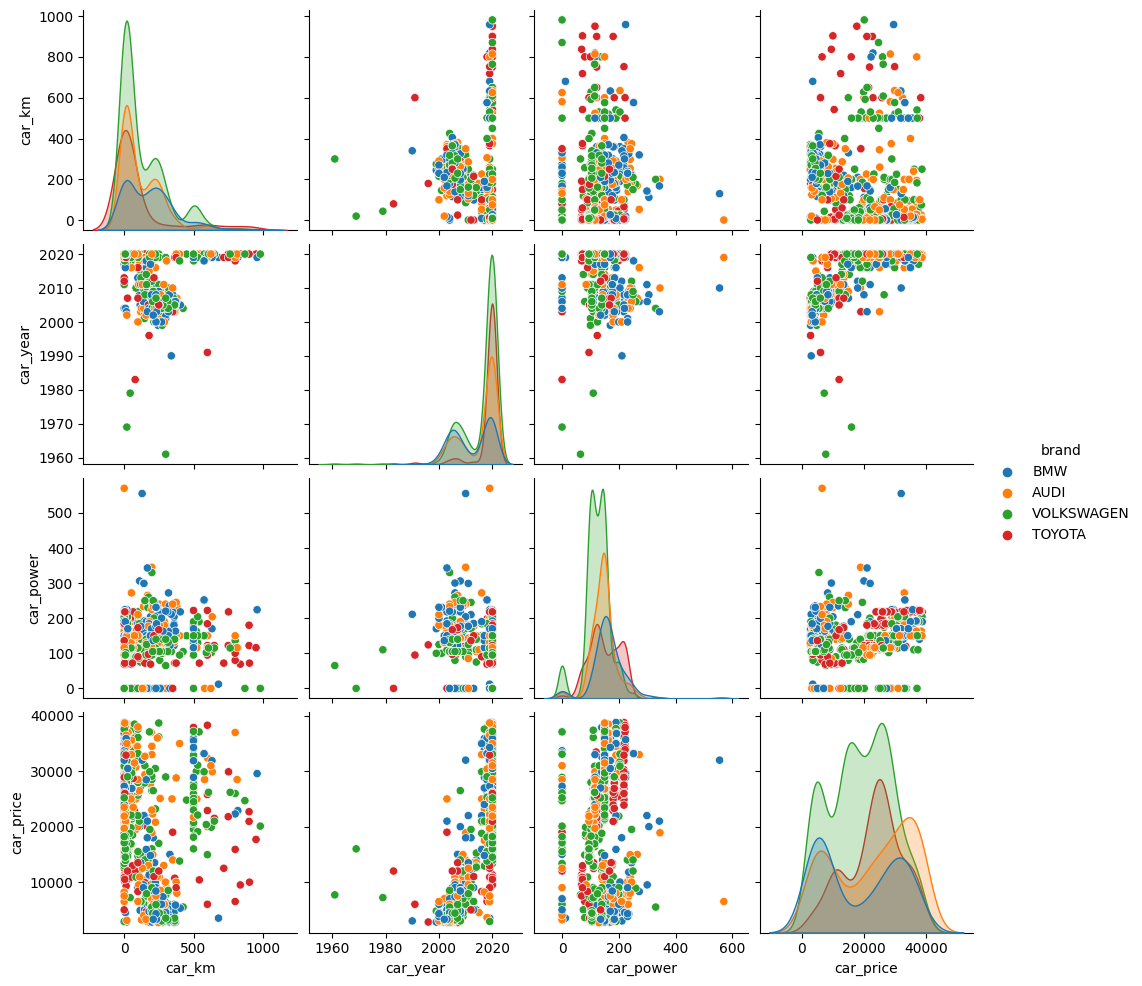

In [121]:
import seaborn as sb
sb.pairplot(cochesUsados[cochesUsados['brand'].isin(['AUDI', 'BMW','TOYOTA','VOLKSWAGEN'])], hue="brand", x_vars=[
            'car_km', 'car_year', 'car_power', 'car_price'], y_vars=['car_km', 'car_year', 'car_power', 'car_price'])


C:\Users\Djmir\AppData\Local\Temp\ipykernel_20696\3915247252.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(cochesUsados.corr(),annot=True)


<AxesSubplot: >

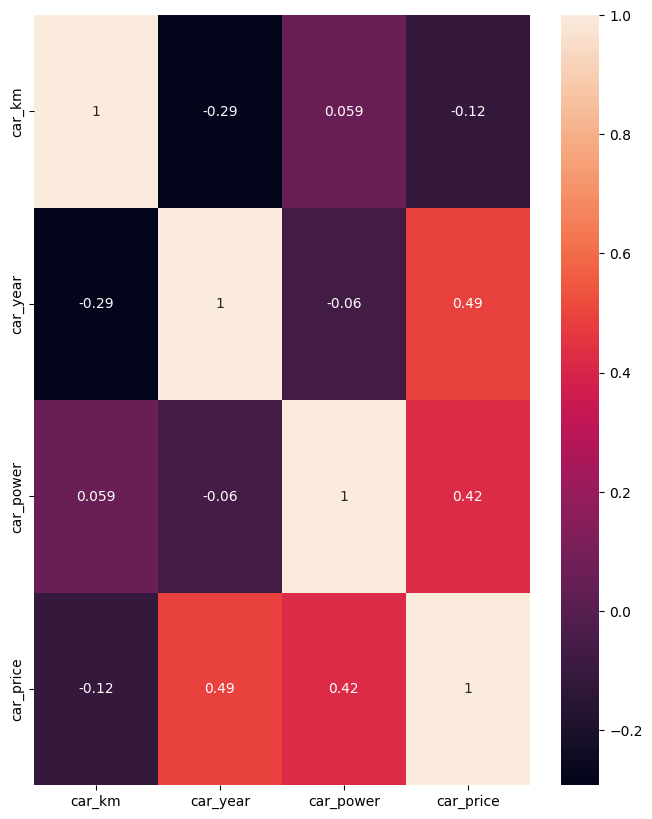

In [122]:
sb.heatmap(cochesUsados.corr(),annot=True)

<AxesSubplot: >

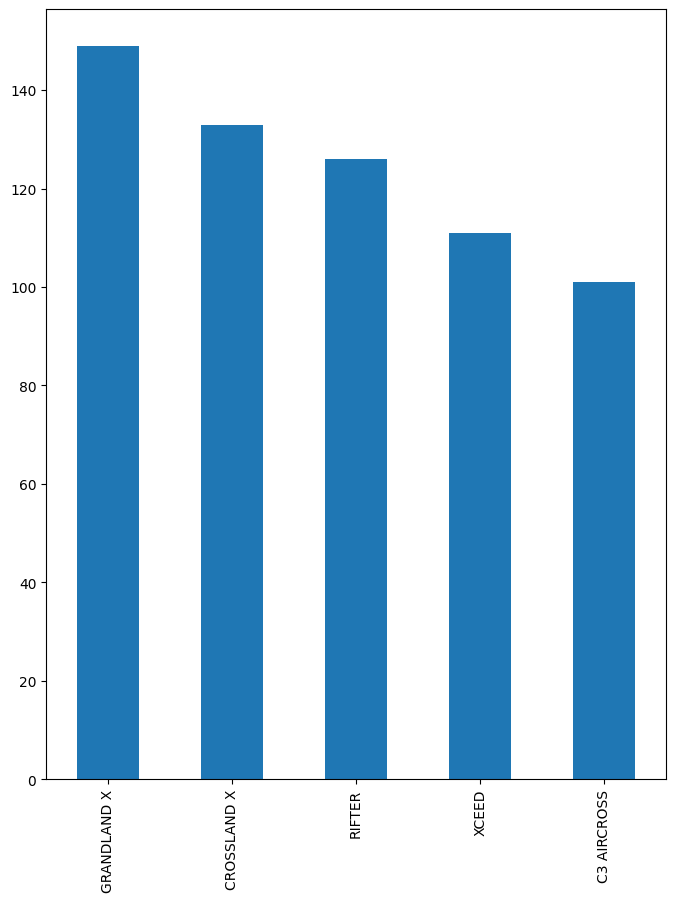

In [123]:
import seaborn as sb
import matplotlib.pyplot as plt
#Mostramos el top de modelos con el mayor numero de coincidencias
cochesUsados['model'].value_counts().iloc[:5].plot(kind="bar")

C:\Users\Djmir\AppData\Local\Temp\ipykernel_20696\2136871324.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = cochesUsados[cochesUsados['brand'].isin(['AUDI', 'BMW','TOYOTA','VOLKSWAGEN','MERCEDES-BENZ','FORD','OPEL'])].groupby(['brand']).mean()


<AxesSubplot: xlabel='brand', ylabel='car_price'>

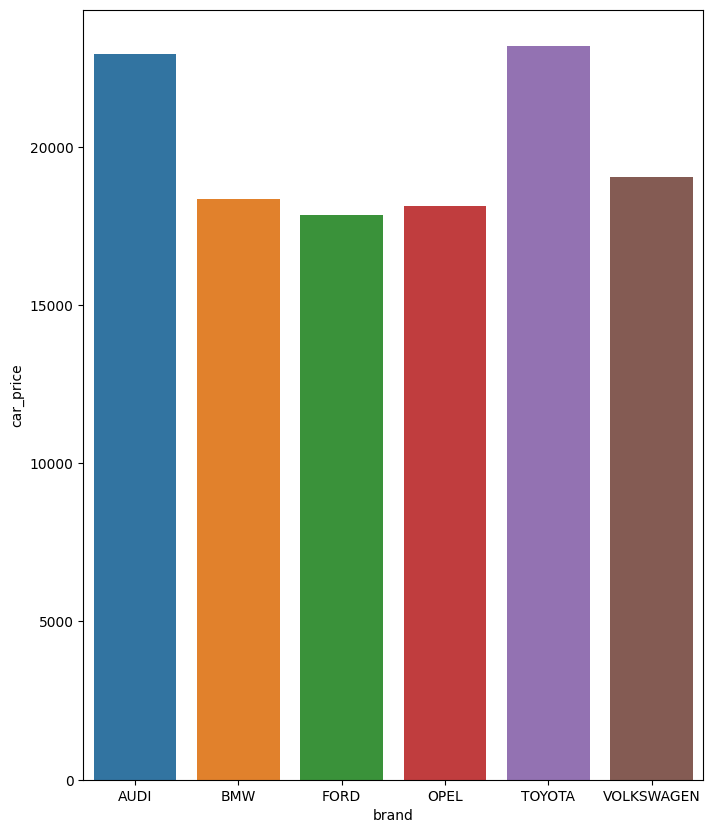

In [124]:
import matplotlib.pyplot as plt

grouped = cochesUsados[cochesUsados['brand'].isin(['AUDI', 'BMW','TOYOTA','VOLKSWAGEN','MERCEDES-BENZ','FORD','OPEL'])].groupby(['brand']).mean()
grouped = grouped.reset_index()

sb.barplot(data=grouped,x='brand',y='car_price')

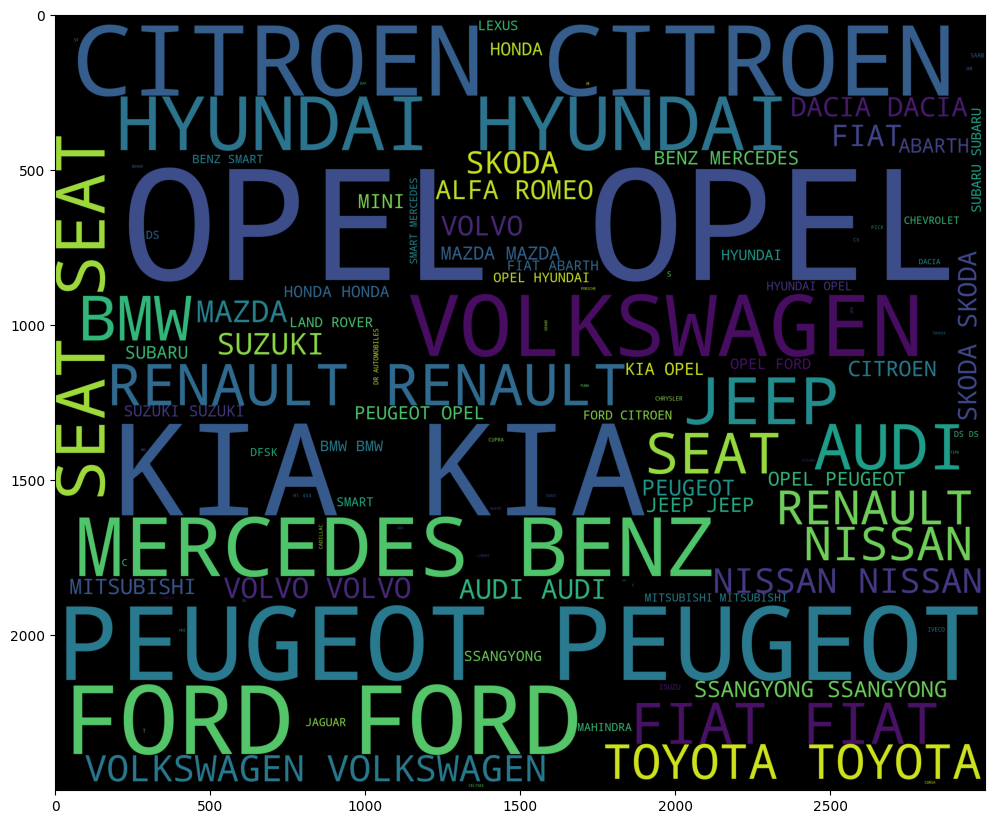

In [125]:
from wordcloud import WordCloud,STOPWORDS

res = " ".join(cochesUsados['brand'])
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',width=3000,height=2500).generate(res)

import matplotlib.pyplot as plt
plt.figure(1,figsize=(12,12))
plt.imshow(wordcloud)
plt.show()

In [126]:
cochesUsados



,car_km,car_year,car_engine_type,car_power,car_price,advertizer_type,region,brand,model
0,2,2020,MANUAL,131,19590,PROFESIONAL,ALAVA,CITROEN,C5 AIRCROSS
1,2,2020,MANUAL,131,17490,PROFESIONAL,ALAVA,CITROEN,C5 AIRCROSS
14,206,2006,MANUAL,218,7800,PARTICULAR,ALAVA,BMW,SERIE 3
67,15,2020,MANUAL,100,13150,PROFESIONAL,ALICANTE,KIA,RIO 10 TGDI 74KW 100CV DRIVE
69,15,2020,MANUAL,140,23500,PROFESIONAL,ALICANTE,KIA,PROCEED
...,...,...,...,...,...,...,...,...,...
247195,1,2020,MANUAL,130,18950,PROFESIONAL,MADRID,CITROEN,BERLINGO TALLA M BLUEHDI 130 SS 6V SHINE
247198,1,2020,MANUAL,102,17900,PROFESIONAL,MADRID,CITROEN,BERLINGO TALLA M BLUEHDI 100 SS SHINE
247199,1,2020,MANUAL,102,17900,PROFESIONAL,MADRID,CITROEN,BERLINGO TALLA M BLUEHDI 100 SS SHINE
247502,100,2020,MANUAL,150,25395,PROFESIONAL,VALENCIA,NISSAN,XTRAIL 5P DCI 110 KW 150 CV E6D NCONNECTA


In [127]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
le = preprocessing.LabelEncoder()



#Labels encoders (brand, model, region, advertizer_type, car_engine_type)
def generateLabelEncoder(data):
    global le
    for key in ['brand','advertizer_type','model','region','car_engine_type']:
        if data[key] is not None:
            data[key] = le.fit_transform(data[key])
            
    else:
        return data

def generateLabelEncoderOnlyTransform(data):
    global le
    for key in ['brand','advertizer_type','model','region','car_engine_type']:
        if data[key] is not None:
            data[key] = le.transform(data[key])
            
    else:
        return data

In [128]:
cochesUsados = generateLabelEncoder(cochesUsados)

<AxesSubplot: >

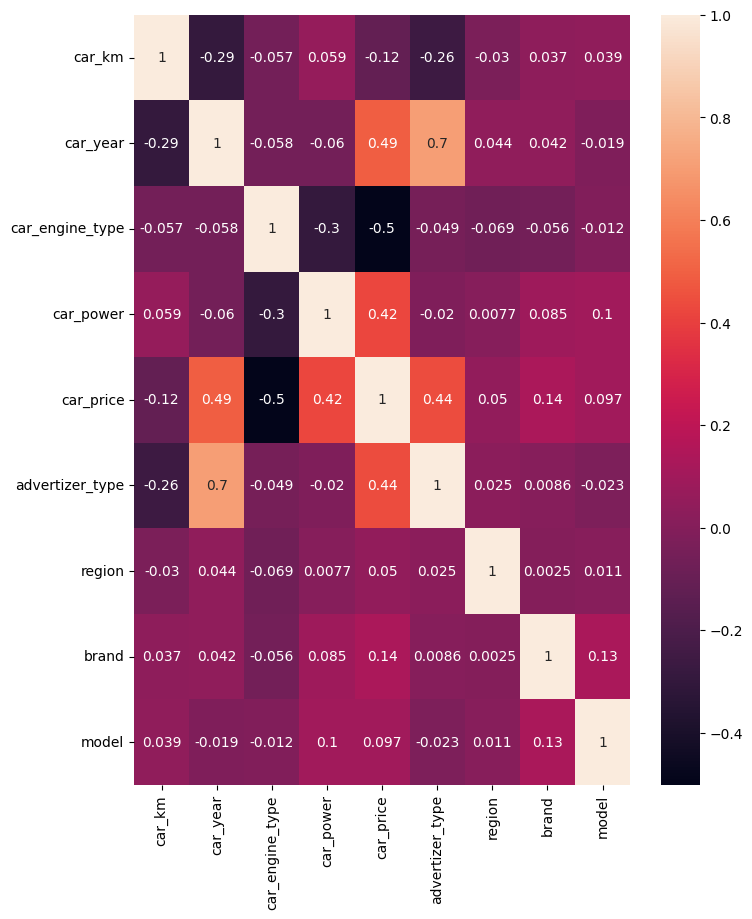

In [129]:
#Con precio
sb.heatmap(cochesUsados.corr(),annot=True)

In [130]:
cor = cochesUsados.corr()
cor_target = abs(cor['car_price'])
cor_target.sort_values(ascending=False)

car_price          1.000000
car_engine_type    0.501364
car_year           0.492291
advertizer_type    0.438193
car_power          0.421037
brand              0.135923
car_km             0.115051
model              0.097200
region             0.049868
Name: car_price, dtype: float64

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from itertools import cycle


cochesUsadosSinPrecio = cochesUsados.copy()

soloPrecioCoches = cochesUsadosSinPrecio['car_price']
cochesUsadosSinPrecio.drop(['car_price'], axis=1, inplace=True)

eighty_percent_trainRawData, twenty_percent_trainRawData, eighty_percent_value_to_compare_results, twenty_percent_value_to_compare_results = train_test_split(
    cochesUsadosSinPrecio, soloPrecioCoches, test_size=0.2,random_state=42)



<AxesSubplot: >

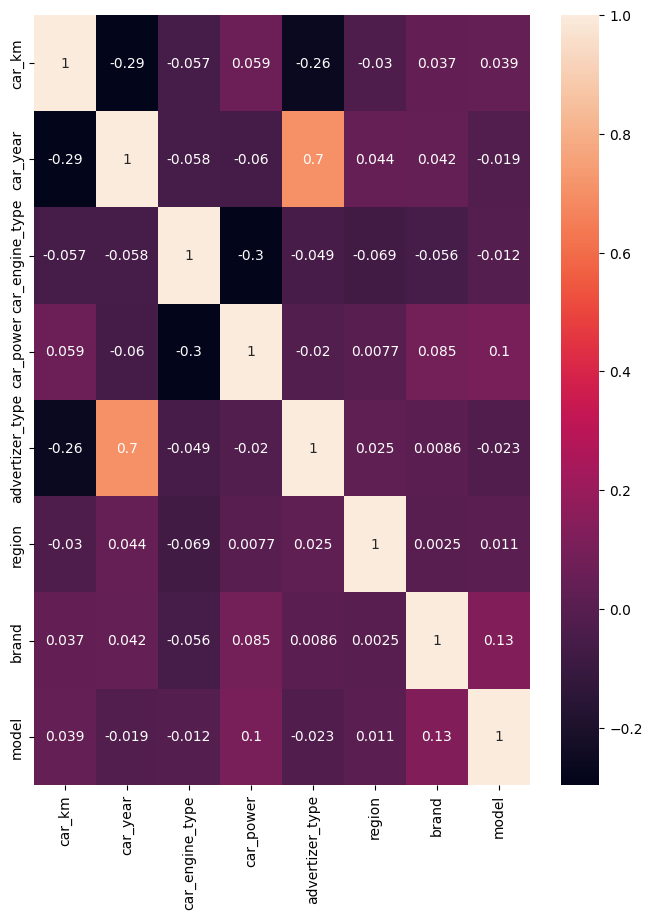

In [132]:
#Sin precio
sb.heatmap(cochesUsadosSinPrecio.corr(),annot=True)

In [133]:
cor = cochesUsadosSinPrecio.corr()
cor_target = abs(cor['car_km'])
cor_target.sort_values(ascending=False)

car_km             1.000000
car_year           0.292332
advertizer_type    0.255995
car_power          0.058947
car_engine_type    0.056614
model              0.039005
brand              0.036888
region             0.030333
Name: car_km, dtype: float64

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression() 
rfe = RFE(model, n_features_to_select=4)
rfe.fit(cochesUsadosSinPrecio, soloPrecioCoches)
print("Features: ", cochesUsadosSinPrecio.columns[rfe.support_])
print("Ranking: ", rfe.ranking_)


Features:  Index(['car_year', 'car_engine_type', 'car_power', 'advertizer_type'], dtype='object')
Ranking:  [4 1 1 1 1 5 2 3]



 LASSO 
 car_km               -0.615010
car_year            827.749853
car_engine_type   -4317.356899
car_power            59.058839
advertizer_type       0.000000
region                5.702151
brand                23.382623
model                 0.817650
dtype: float64
Lasso ha escogido 7 variables y ha eliminado otras 1 variables


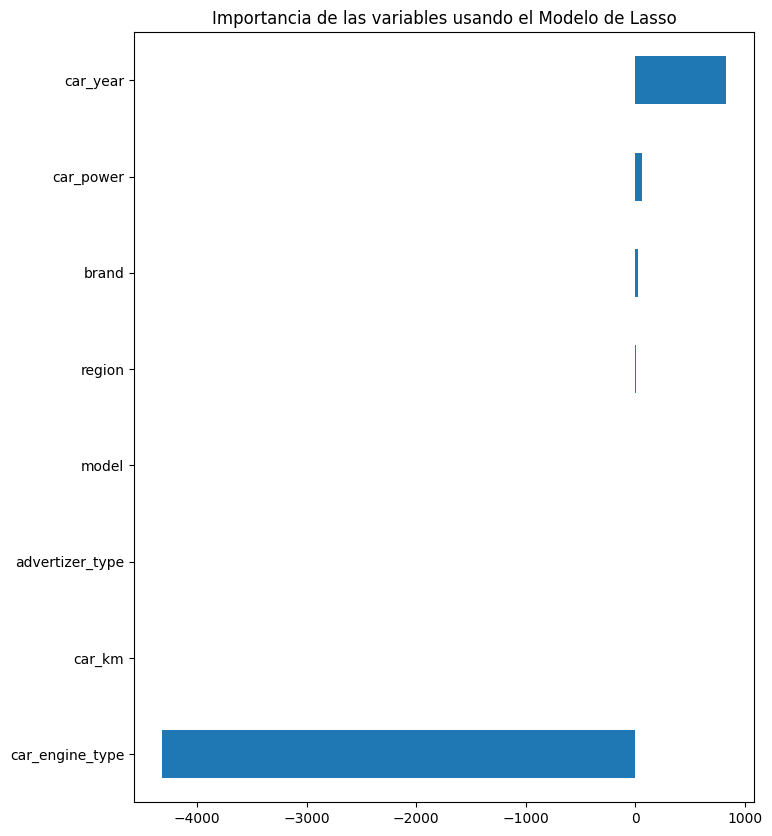

In [135]:
from sklearn.linear_model import LassoCV
model = LassoCV()
model.fit(eighty_percent_trainRawData,eighty_percent_value_to_compare_results)
coef = pd.Series(model.coef_, index=eighty_percent_trainRawData.columns)
print("\n LASSO \n",coef)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Importancia de las variables usando el Modelo de Lasso")
print("Lasso ha escogido " + str(sum(coef != 0)) + " variables y ha eliminado otras " +  str(sum(coef == 0)) + " variables")



 RIDGE 
 car_km               -0.418006
car_year            616.723096
car_engine_type   -6545.483529
car_power            52.715645
advertizer_type    5473.292695
region                2.298433
brand                24.147634
model                 0.868856
dtype: float64
Ridge ha escogido 8 variables y ha eliminado otras 0 variables


Text(0.5, 1.0, 'Importancia de las variables usando el Modelo de Ridge')

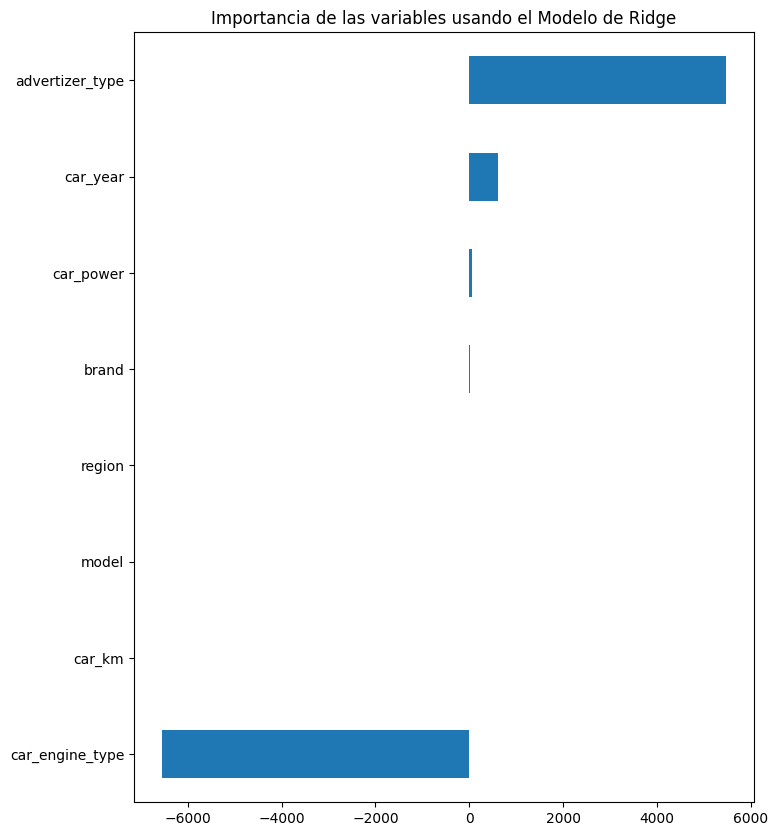

In [136]:
from sklearn.linear_model import RidgeCV
model = RidgeCV()
model.fit(eighty_percent_trainRawData,eighty_percent_value_to_compare_results)
coef = pd.Series(model.coef_, index=eighty_percent_trainRawData.columns)
print("\n RIDGE \n",coef)
print("Ridge ha escogido " + str(sum(abs(coef) != 0)) + " variables y ha eliminado otras " +  str(sum(abs(coef) == 0)) + " variables")

imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Importancia de las variables usando el Modelo de Ridge")

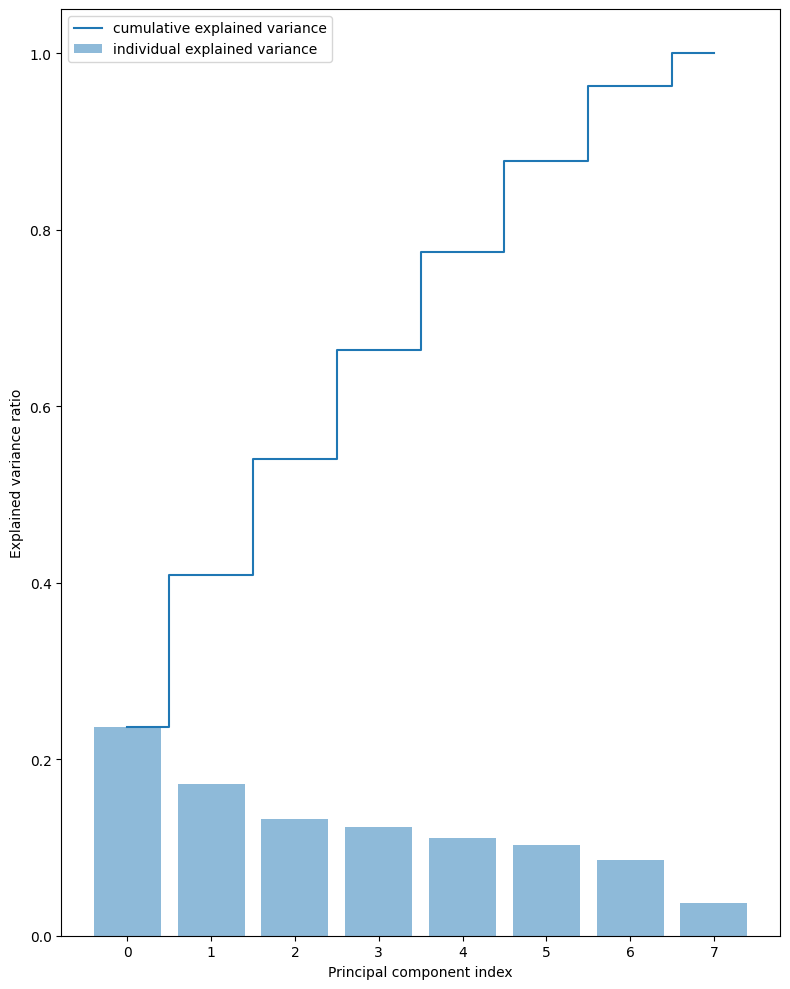

In [137]:
from sklearn.decomposition import PCA
scaler = StandardScaler()

eighty_percent_trainRawData_scaled = scaler.fit_transform(eighty_percent_trainRawData)
twenty_percent_trainRawData_scaled = scaler.transform(eighty_percent_trainRawData)

pca = PCA()
X_train_pca = pca.fit_transform(eighty_percent_trainRawData_scaled)
X_test_pca = pca.transform(twenty_percent_trainRawData_scaled)
pca.explained_variance_ratio_

import numpy as np
import matplotlib.pyplot as plt
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0, len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label="individual explained variance")
plt.step(range(0, len(exp_var_pca)), cum_sum_eigenvalues, where="mid", label="cumulative explained variance")
plt.ylabel('Explained variance ratio')        
plt.xlabel("Principal component index")
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [138]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(eighty_percent_trainRawData_scaled, eighty_percent_value_to_compare_results)
X_test_lda = lda.transform(twenty_percent_trainRawData_scaled)
exp_var_lda = lda.explained_variance_ratio_
exp_var_lda

array([0.50412899, 0.20803343, 0.0647641 , 0.05996632, 0.05225342,
       0.04301112, 0.04068864, 0.02715398])

In [139]:
import tensorflow as tf
from tensorflow import keras

def test_all_activation_functions(X_train, y_train, X_test, y_test):
    activation_functions = ['sigmoid','tanh','relu','softplus']

    # almacena las puntuaciones de cada función de activación
    scores = []

    # itera sobre las funciones de activación
    for activation_function in activation_functions:
        # define la arquitectura de la red neuronal
        model = keras.Sequential([
            keras.layers.Dense(10, input_dim=X_train.shape[1], activation=activation_function),
            keras.layers.Dense(1,activation=activation_function)
        ])

        # compila el modelo
        model.compile(optimizer="adam", loss="mean_squared_error",metrics=["accuracy"])

        # entrena el modelo
        model.fit(X_train, y_train, epochs=10, verbose=0,batch_size=128)

        # evalúa el modelo
        score = model.evaluate(X_test, y_test, verbose=0)

        # almacena la puntuación
        scores.append(score)

    # devuelve la función de activación con mejor puntuación
    return activation_functions[scores.index(min(scores))]

In [140]:
from sklearn import ensemble
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def trainModels(X_train,Y_train,X_test,Y_test,activation_function):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(20,activation=activation_function,input_shape=(X_train.shape[1],)))
    model.add(Dense(1,activation='softmax'))
    model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
    model.summary()


    history_reg = model.fit(X_train,Y_train ,epochs=100, validation_data=(X_test, Y_test))


    print("Pesos y bias: ",model.weights)
    print("Salida: ",model.output)

    model = LinearRegression()
    history_reg = model.fit(X_train,Y_train)
    score = model.score(X_test,Y_test)
    print("Model Accuracy: %.3f" % model.score(X_test, Y_test))

    mse = mean_squared_error(Y_test,model.predict(X_test))
    print("Error cuadratico medio (MSE): {:.4f}".format(mse))


    clf = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2, learning_rate=0.1, loss='ls')
    
    history_reg = clf.fit(X_train,Y_train)
    scoreEnsemble = clf.score(X_test,Y_test)

    print("Model Accuracy: %.3f" % clf.score(X_test, Y_test))

    mse = mean_squared_error(Y_test,clf.predict(X_test))
    print("Error cuadratico medio (MSE): {:.4f}".format(mse))
    
activation_function = test_all_activation_functions(eighty_percent_trainRawData,
                              eighty_percent_value_to_compare_results,
                              twenty_percent_trainRawData,
                              twenty_percent_value_to_compare_results)

trainModels(eighty_percent_trainRawData,eighty_percent_value_to_compare_results,twenty_percent_trainRawData,twenty_percent_value_to_compare_results,activation_function)


Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 20)                180       
                                                                 
 dense_115 (Dense)           (None, 1)                 21        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
216/216 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
216/216 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
216/216 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 -

c:\Users\Djmir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


Model Accuracy: 0.907
Error cuadratico medio (MSE): 6049274.6944


In [141]:
#Con reducción de la dimensionalidad

columns = ['advertizer_type','car_year','car_km','car_engine_type']
eighty_percent_trainRawData_min = eighty_percent_trainRawData[columns]
twenty_percent_trainRawData_min = twenty_percent_trainRawData[columns]

activation_function = test_all_activation_functions(eighty_percent_trainRawData_min,
                              eighty_percent_value_to_compare_results,
                              twenty_percent_trainRawData_min,
                              twenty_percent_value_to_compare_results)

trainModels(eighty_percent_trainRawData_min,eighty_percent_value_to_compare_results,twenty_percent_trainRawData_min,twenty_percent_value_to_compare_results,activation_function)


Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_124 (Dense)           (None, 20)                100       
                                                                 
 dense_125 (Dense)           (None, 1)                 21        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
216/216 [==============================] - 3s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
216/216 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
216/216 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 -

c:\Users\Djmir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


Model Accuracy: 0.553
Error cuadratico medio (MSE): 29099449.0460


In [142]:
# Visualizamos la precisión
# import matplotlib.pyplot as plt
# plt.plot(history_reg.history['accuracy'])
# plt.title('Precisión modelo')
# plt.show()

In [143]:
# Visualizamos pérdidas
# plt.plot(history_reg_clf.history['loss'])
# plt.plot(history_reg_clf.history['val_loss'])
# plt.title('Pérdidas modelo')
# plt.ylabel('Pérdidas')
# plt.xlabel('Época')
# plt.legend(['Entrenamiento', 'Validación'], loc="upper right")
# plt.show()


In [144]:
pruebas = pd.read_csv('pruebas.csv')
#pruebas = cleanData(pruebas)
pruebas = generateLabelEncoderOnlyTransform(pruebas)
pruebas.drop('car_price',axis=1,inplace=True)
print(pruebas)

#y_test = clf.predict(pruebas)
#print(y_test)

#twenty_percent_trainRawData #x
#twenty_percent_value_to_compare_results #y
#print(scaler.inverse_transform(y_test))
#le.inverse_transform(twenty_percent_trainRawData[1])

#metrics_evaluation = model.evaluate(twenty_percent_trainRawData, twenty_percent_value_to_compare_results, verbose=0)
#print("Precisión en test:", metrics_evaluation[1])



ValueError: y contains previously unseen labels: 'FORD'

In [ ]:
cochesUsados.to_csv('testExportacion.csv')